In [33]:
import emoji
import re
import snownlp
from snownlp import SnowNLP
import pandas as pd
sh = pd.read_csv('E:\\dasein_py\\Saihong.csv',index_col=0,delimiter="\t",header=0)
sh = sh.reset_index()
sh.head(5)

,comment
0,整体评价：清纯可爱 包装与外观：卡哇伊 持久情况：很持久 上妆效果：美哒哒
1,收到比很多图片拍的看上去小。。好可爱吖 好想笑😂😂里面的腮红看上去质量很好的样子 铁皮质感也好👍
2,小小一个，方便携带～
3,很q很可爱的腮红 颜色还可以 滋润度也不错
4,很q很可爱的腮红 颜色还可以 滋润度也不错


In [34]:
import emoji
sh['comment'] = sh['comment'].apply(lambda x: re.sub(':\S+?:', ' ', emoji.demojize(x)))
sh.drop_duplicates(inplace=True)
sh.head(5)

In [35]:
sh['emotion'] = sh['comment'].apply(lambda x: SnowNLP(x).sentiments)

In [36]:
import jieba
import json


# 读取停用词列表
def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    # 
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list


# 分词 然后清除停用词语
def clean_stopword(str, stopword_list):
    result = ''
    word_list = jieba.lcut(str)   # 分词后返回一个列表  jieba.cut(）   返回的是一个迭代器
    for w in word_list:
        if w not in stopword_list:
            result += w
    return result
stopword_file = 'E:\\dasein_py\\hit_stopwords.txt'
stopword_list = get_stopword_list(stopword_file)    # 获得停用词列表

In [37]:
sh['comment'] = sh['comment'].apply(lambda x: clean_stopword(x, stopword_list))
sh

,comment,emotion
0,整体评价清纯可爱 包装外观卡哇伊 持久情况很持久 上妆效果美哒哒,0.997773
1,收到很多图片拍看上去小好可爱吖 好想笑 里面腮红看上去质量很好样子 铁皮质感,0.999815
2,小小方便携带,0.889111
3,很q很可爱腮红 颜色还 滋润度不错,0.998834
5,好迷你不是干粉腮红颜色还行便宜看上包装买很可爱,0.995648
...,...,...
434,颜色很淡雅适合新手,0.907023
435,颜色超好看,0.728134
436,小小一颗 好可爱,0.933894
438,很好看 真的好小一只,0.891940


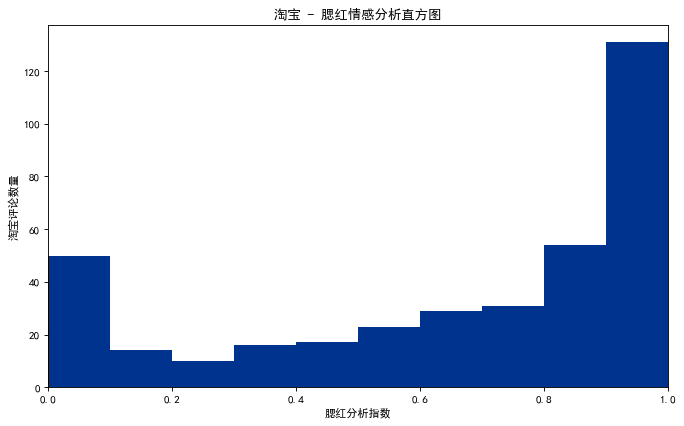

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
import numpy as np
bins = np.arange(0,1.1,0.1)	#设置区间
plt.figure(figsize=(10,6),dpi=80)
plt.hist(sh['emotion'],bins,color='#00338D',alpha=1)
plt.xlim(0,1)
plt.xlabel('腮红分析指数')
plt.ylabel('淘宝评论数量')
plt.title('淘宝 - 腮红情感分析直方图')
# plt.savefig('淘宝 - 腮红情感分析直方图.png')
plt.show()

In [41]:
pos,neg = 0,0
for  i in sh['emotion']:
	if i >= 0.5:
		pos += 1
	else:
		neg += 1
print(f'积极数据为：{pos}' + '\n' + f'消极数据为：{neg}')

积极数据为：268
消极数据为：107


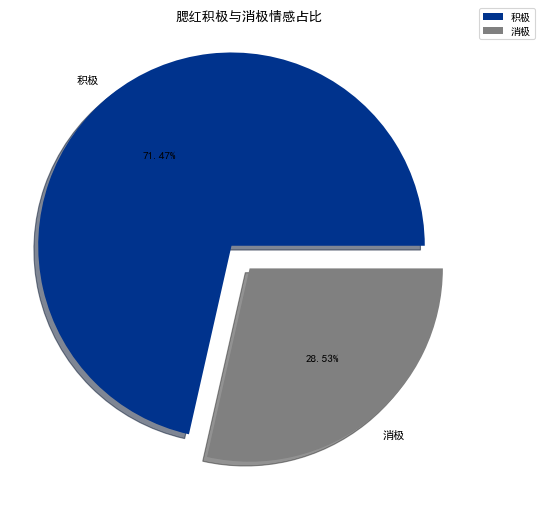

In [42]:
pie_labels = '积极','消极'
fig = plt.figure('腮红积极与消极情感占比', figsize=(8, 8),dpi=80)
plt.pie([pos,neg],
        labels=pie_labels,
        autopct='%1.2f%%',
        shadow=True,
        colors=['#00338D','grey'],
       explode=[0.15,0])
plt.legend( loc = 'upper right',bbox_to_anchor=(1.1, 1.05), fontsize=9)
plt.title('腮红积极与消极情感占比')
# plt.savefig('腮红积极与消极情感占比.png')
plt.show()